In [41]:
import pandas as pd
import numpy as np

In [42]:
df=pd.read_csv("ecommerce.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [43]:
df=df.drop(['uniq_id','product_url'],axis=1)


In [44]:
df.head()

,crawl_timestamp,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,2016-03-25 22:59:23 +0000,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,2016-03-25 22:59:23 +0000,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,2016-03-25 22:59:23 +0000,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,2016-03-25 22:59:23 +0000,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,2016-03-25 22:59:23 +0000,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [45]:
df.dtypes

crawl_timestamp             object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

In [6]:
df["crawl_timestamp"]=pd.to_datetime(df["crawl_timestamp"])

In [46]:
df.isnull().sum()

crawl_timestamp               0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [47]:
df[df.brand.isnull()]

,crawl_timestamp,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
25,2016-01-03 20:56:50 +0000,Glus Wedding Lingerie Set,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",LINE92U9KGZG25AY,1299.0,699.0,"[""http://img5a.flixcart.com/image/lingerie-set...",False,Glus Wedding Lingerie Set - Buy Turquoise Glus...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of ..."
26,2016-01-03 20:56:50 +0000,Veelys Shiny White Quad Roller Skates - Size 4...,"[""Sports & Fitness >> Other Sports >> Skating ...",SKTEC88WSNYJKWY7,3199.0,2499.0,"[""http://img6a.flixcart.com/image/skate/w/y/7/...",False,Veelys Shiny White Quad Roller Skates - Size 4...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Playing Le..."
27,2016-01-03 20:56:50 +0000,Bulaky vanity case Jewellery Vanity Case,"[""Beauty and Personal Care >> Makeup >> Vanity...",VANDZY4YZFPEG85T,499.0,390.0,"[""http://img6a.flixcart.com/image/vanity-box/8...",False,Buy Bulaky vanity case Jewellery Vanity Case f...,3,3,NaN,"{""product_specification""=>{""key""=>""Body Materi..."
28,2016-01-03 20:56:50 +0000,FDT Women's Leggings,"[""Clothing >> Women's Clothing >> Fusion Wear ...",LJGEB2KMCMMHHFC7,699.0,309.0,"[""http://img6a.flixcart.com/image/legging-jegg...",False,FDT Women's Leggings - Buy Parrot Green FDT Wo...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of ..."
29,2016-01-03 20:56:50 +0000,Madcaps C38GR30 Men's Cargos,"[""Clothing >> Men's Clothing >> Cargos, Shorts...",CRGE6A53UX7CJMXX,2199.0,1699.0,"[""http://img5a.flixcart.com/image/cargo/n/g/h/...",False,Madcaps C38GR30 Men's Cargos - Buy Green Madca...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19936,2015-12-01 10:15:43 +0000,Purple Women Heels,"[""Footwear >> Women's Footwear >> Heels""]",SNDEY8UH5TZ2AJCK,1099.0,899.0,"[""http://img6a.flixcart.com/image/sandal/u/9/w...",False,Flipkart.com: Buy Purple Women Heels only for ...,2,2,NaN,"{""product_specification""=>[{""key""=>""Occasion"",..."
19941,2015-12-01 10:15:43 +0000,Pinq Chiq Women Heels,"[""Footwear >> Women's Footwear >> Heels""]",SNDEYPKYZ47RUKSX,1099.0,769.0,"[""http://img5a.flixcart.com/image/sandal/z/s/q...",False,Flipkart.com: Buy Pinq Chiq Women Heels only f...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Ideal For""..."
19953,2015-12-01 10:15:43 +0000,La Isla Women Heels,"[""Footwear >> Women's Footwear >> Heels""]",SNDEY7QPH3YZFQYW,2599.0,779.0,"[""http://img6a.flixcart.com/image/sandal/w/h/6...",False,Flipkart.com: Buy La Isla Women Heels only for...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Ideal For""..."
19958,2015-12-01 10:15:43 +0000,We Witches Comfy Hues Women Wedges,"[""Footwear >> Women's Footwear >> Wedges""]",SNDDX969ZZJJKSHB,899.0,899.0,"[""http://img5a.flixcart.com/image/sandal/m/y/z...",False,Flipkart.com: Buy We Witches Comfy Hues Women ...,5,5,NaN,"{""product_specification""=>[{""key""=>""Occasion"",..."


In [9]:
#df.dropna(subset=["brand"],inplace=True)

In [10]:
#df.dropna(how="any",inplace=True)

In [48]:
df.isnull().sum()

crawl_timestamp               0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [49]:
df.shape

(20000, 13)

In [50]:
df.columns

Index(['crawl_timestamp', 'product_name', 'product_category_tree', 'pid',
       'retail_price', 'discounted_price', 'image', 'is_FK_Advantage_product',
       'description', 'product_rating', 'overall_rating', 'brand',
       'product_specifications'],
      dtype='object')

In [51]:
df.head()

,crawl_timestamp,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,2016-03-25 22:59:23 +0000,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,2016-03-25 22:59:23 +0000,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,2016-03-25 22:59:23 +0000,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,2016-03-25 22:59:23 +0000,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,2016-03-25 22:59:23 +0000,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [15]:
#df["product_category_tree"]=df["product_category_tree"].str[2:]

In [52]:
df["product_category_tree"]

0        ["Clothing >> Women's Clothing >> Lingerie, Sl...
1        ["Furniture >> Living Room Furniture >> Sofa B...
2        ["Footwear >> Women's Footwear >> Ballerinas >...
3        ["Clothing >> Women's Clothing >> Lingerie, Sl...
4        ["Pet Supplies >> Grooming >> Skin & Coat Care...
                               ...                        
19995    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19996    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19997    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19998    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19999    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
Name: product_category_tree, Length: 20000, dtype: object

In [53]:
df["first_category"]=df["product_category_tree"].apply(lambda x: x.split('>>')[0][2:])

In [54]:
def sec(x):
    try:
        return x.split('>>')[1][1:]
    except IndexError:
        return "none"

def third(x):
    try:
        return x.split('>>')[2][1:]
    except IndexError:
        return "none"
    
    
def quart(x):
    try:
        return x.split('>>')[3][1:]
    except IndexError:
        return "none"





df["sec_category"]=df["product_category_tree"].apply(lambda x: sec(x))
df["third_category"]=df["product_category_tree"].apply(lambda x: third(x))
df["fourth_category"]=df["product_category_tree"].apply(lambda x: quart(x))

In [55]:
df.head()

,crawl_timestamp,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,first_category,sec_category,third_category,fourth_category
0,2016-03-25 22:59:23 +0000,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
1,2016-03-25 22:59:23 +0000,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,2016-03-25 22:59:23 +0000,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",Footwear,Women's Footwear,Ballerinas,"AW Bellies""]"
3,2016-03-25 22:59:23 +0000,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
4,2016-03-25 22:59:23 +0000,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",Pet Supplies,Grooming,Skin & Coat Care,Shampoo


In [59]:
new=df.groupby("first_category").sum().reset_index()
new

,first_category,retail_price,discounted_price,is_FK_Advantage_product
0,"883 Police Full Sleeve Solid Men's Jacket""]",7499.0,6374.0,0.0
1,"ABEEZ Boys, Men, Girls (Black, Pack of 1)""]",399.0,289.0,0.0
2,"ANAND ARCHIES Girls Flats""]",998.0,898.0,0.0
3,"ANAND ARCHIES Girls Wedges""]",899.0,899.0,0.0
4,"ANASAZI Casual 3/4 Sleeve Solid Women's Top""]",899.0,899.0,0.0
...,...,...,...,...
261,run of luck Solid Women's Round Neck Dark Blue...,299.0,299.0,0.0
262,"soie Fashion Women's Full Coverage Bra""]",540.0,486.0,0.0
263,"soie Fashion Women's Sports Bra""]",880.0,792.0,0.0
264,"tadd Men's, Women's Ankle Length Socks""]",499.0,199.0,0.0


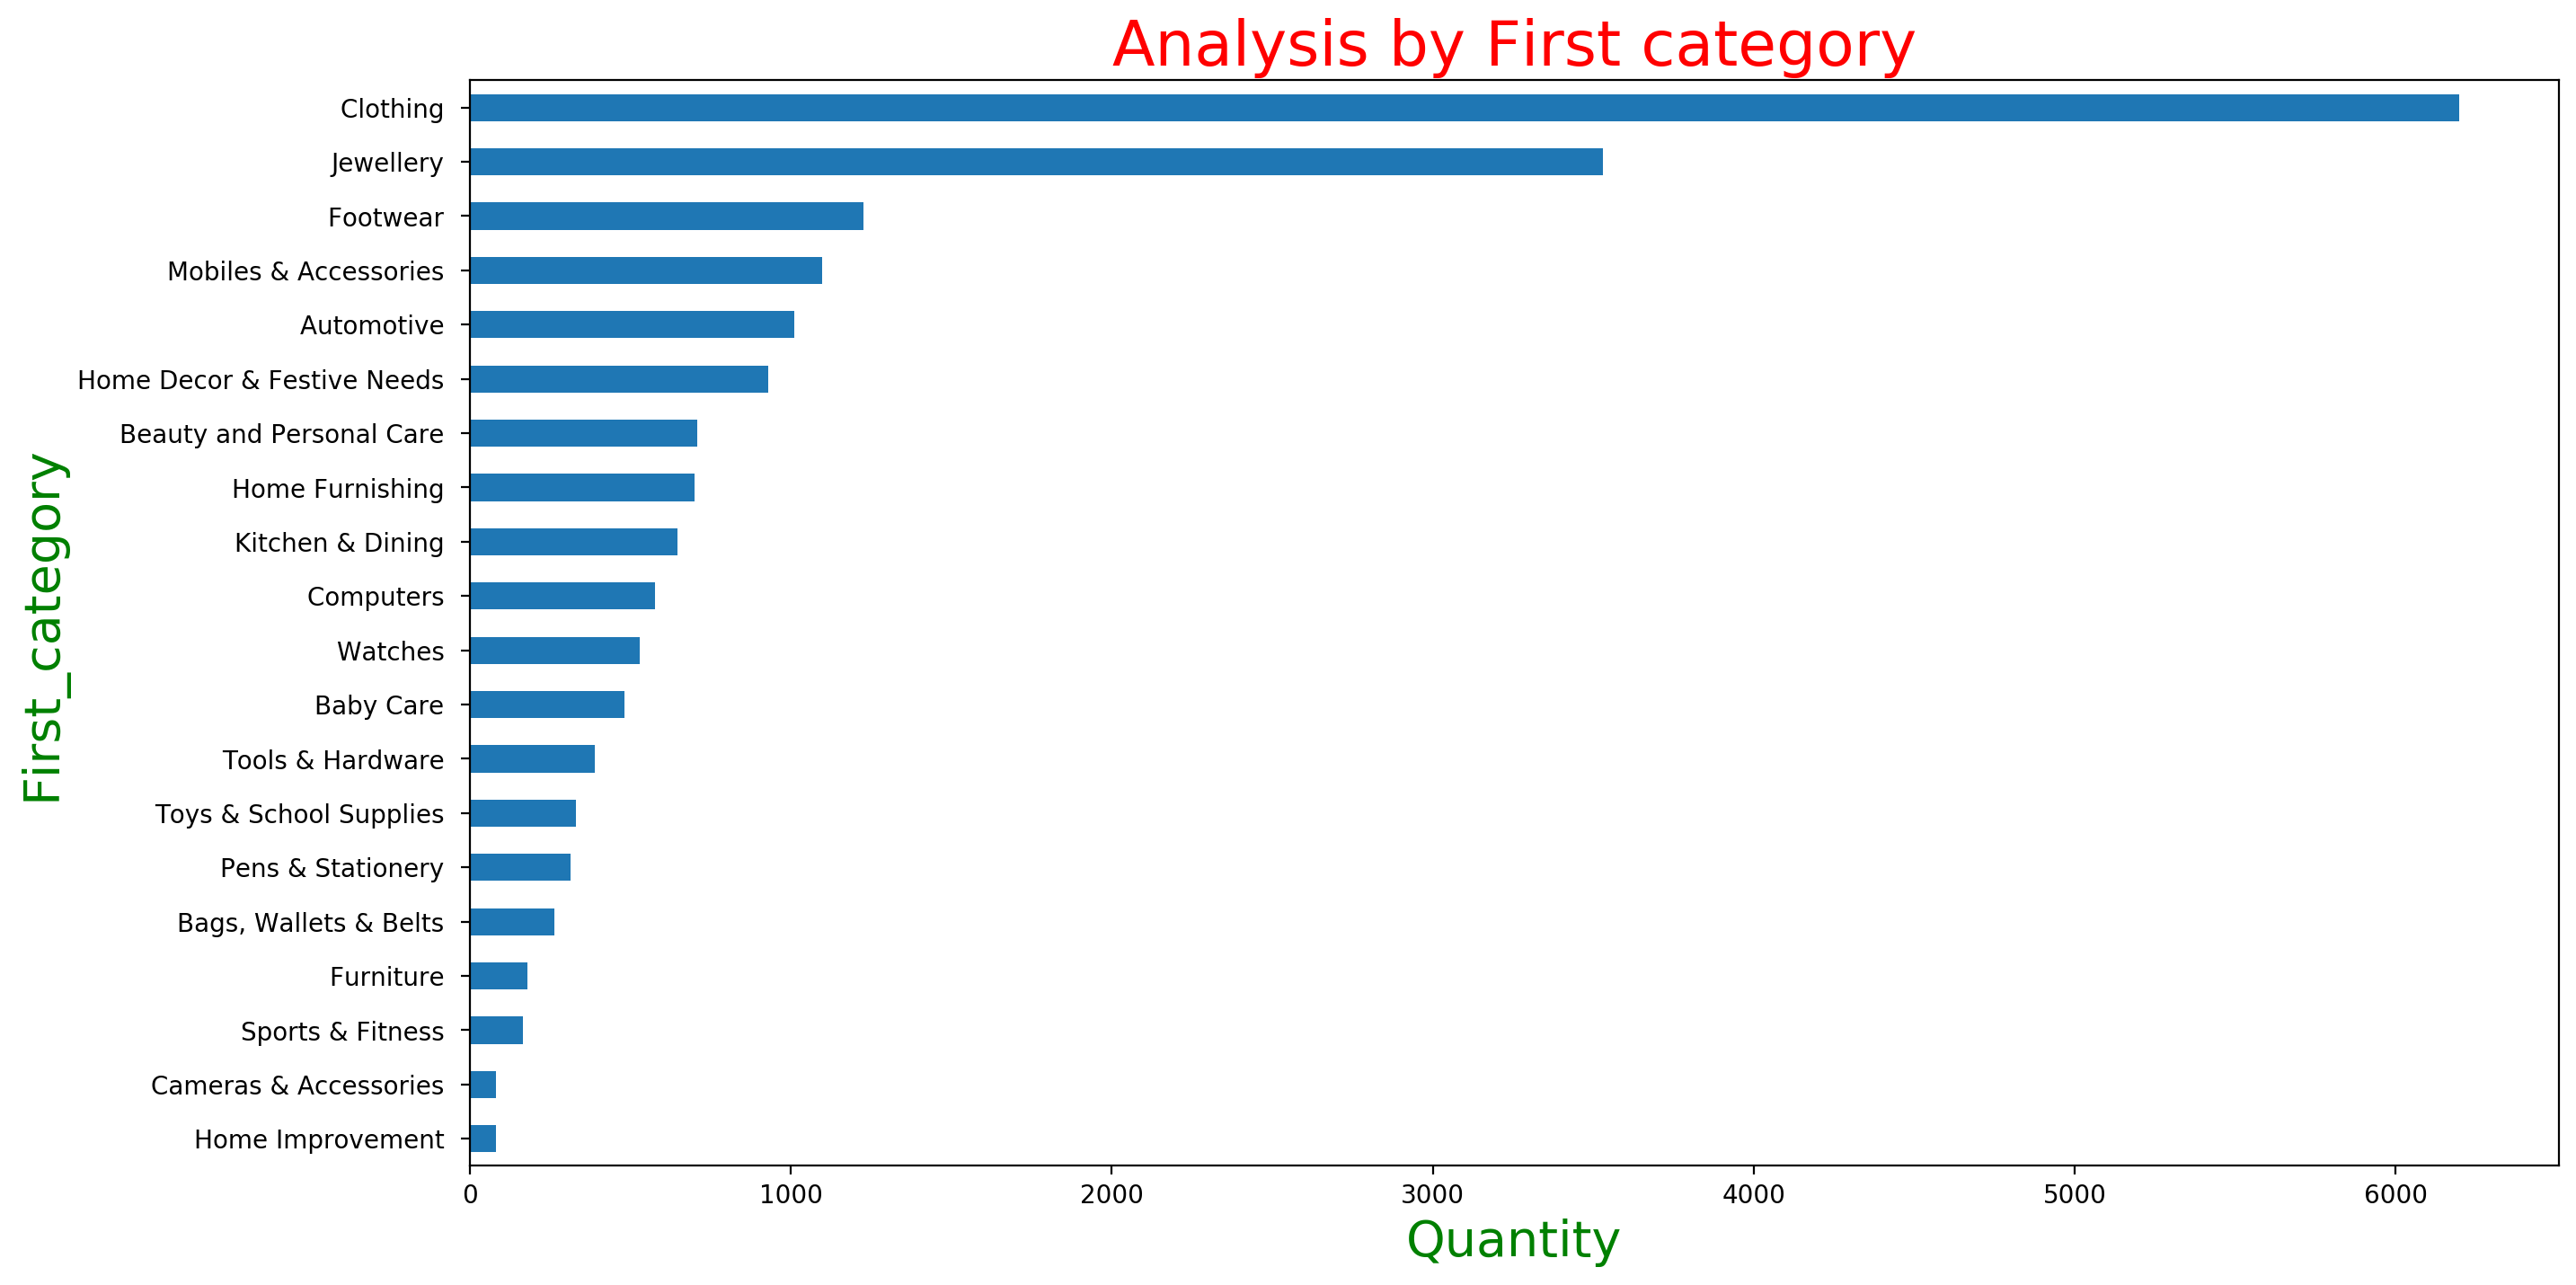

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8),dpi=200)
df.first_category.value_counts()[:20].sort_values(ascending=True).plot(kind="barh")
plt.xlabel("Quantity",fontsize=20,color="green")
plt.ylabel("First_category",fontsize=20,color="green")
plt.title("Analysis by First category",fontsize=25,color="red")
plt.show()

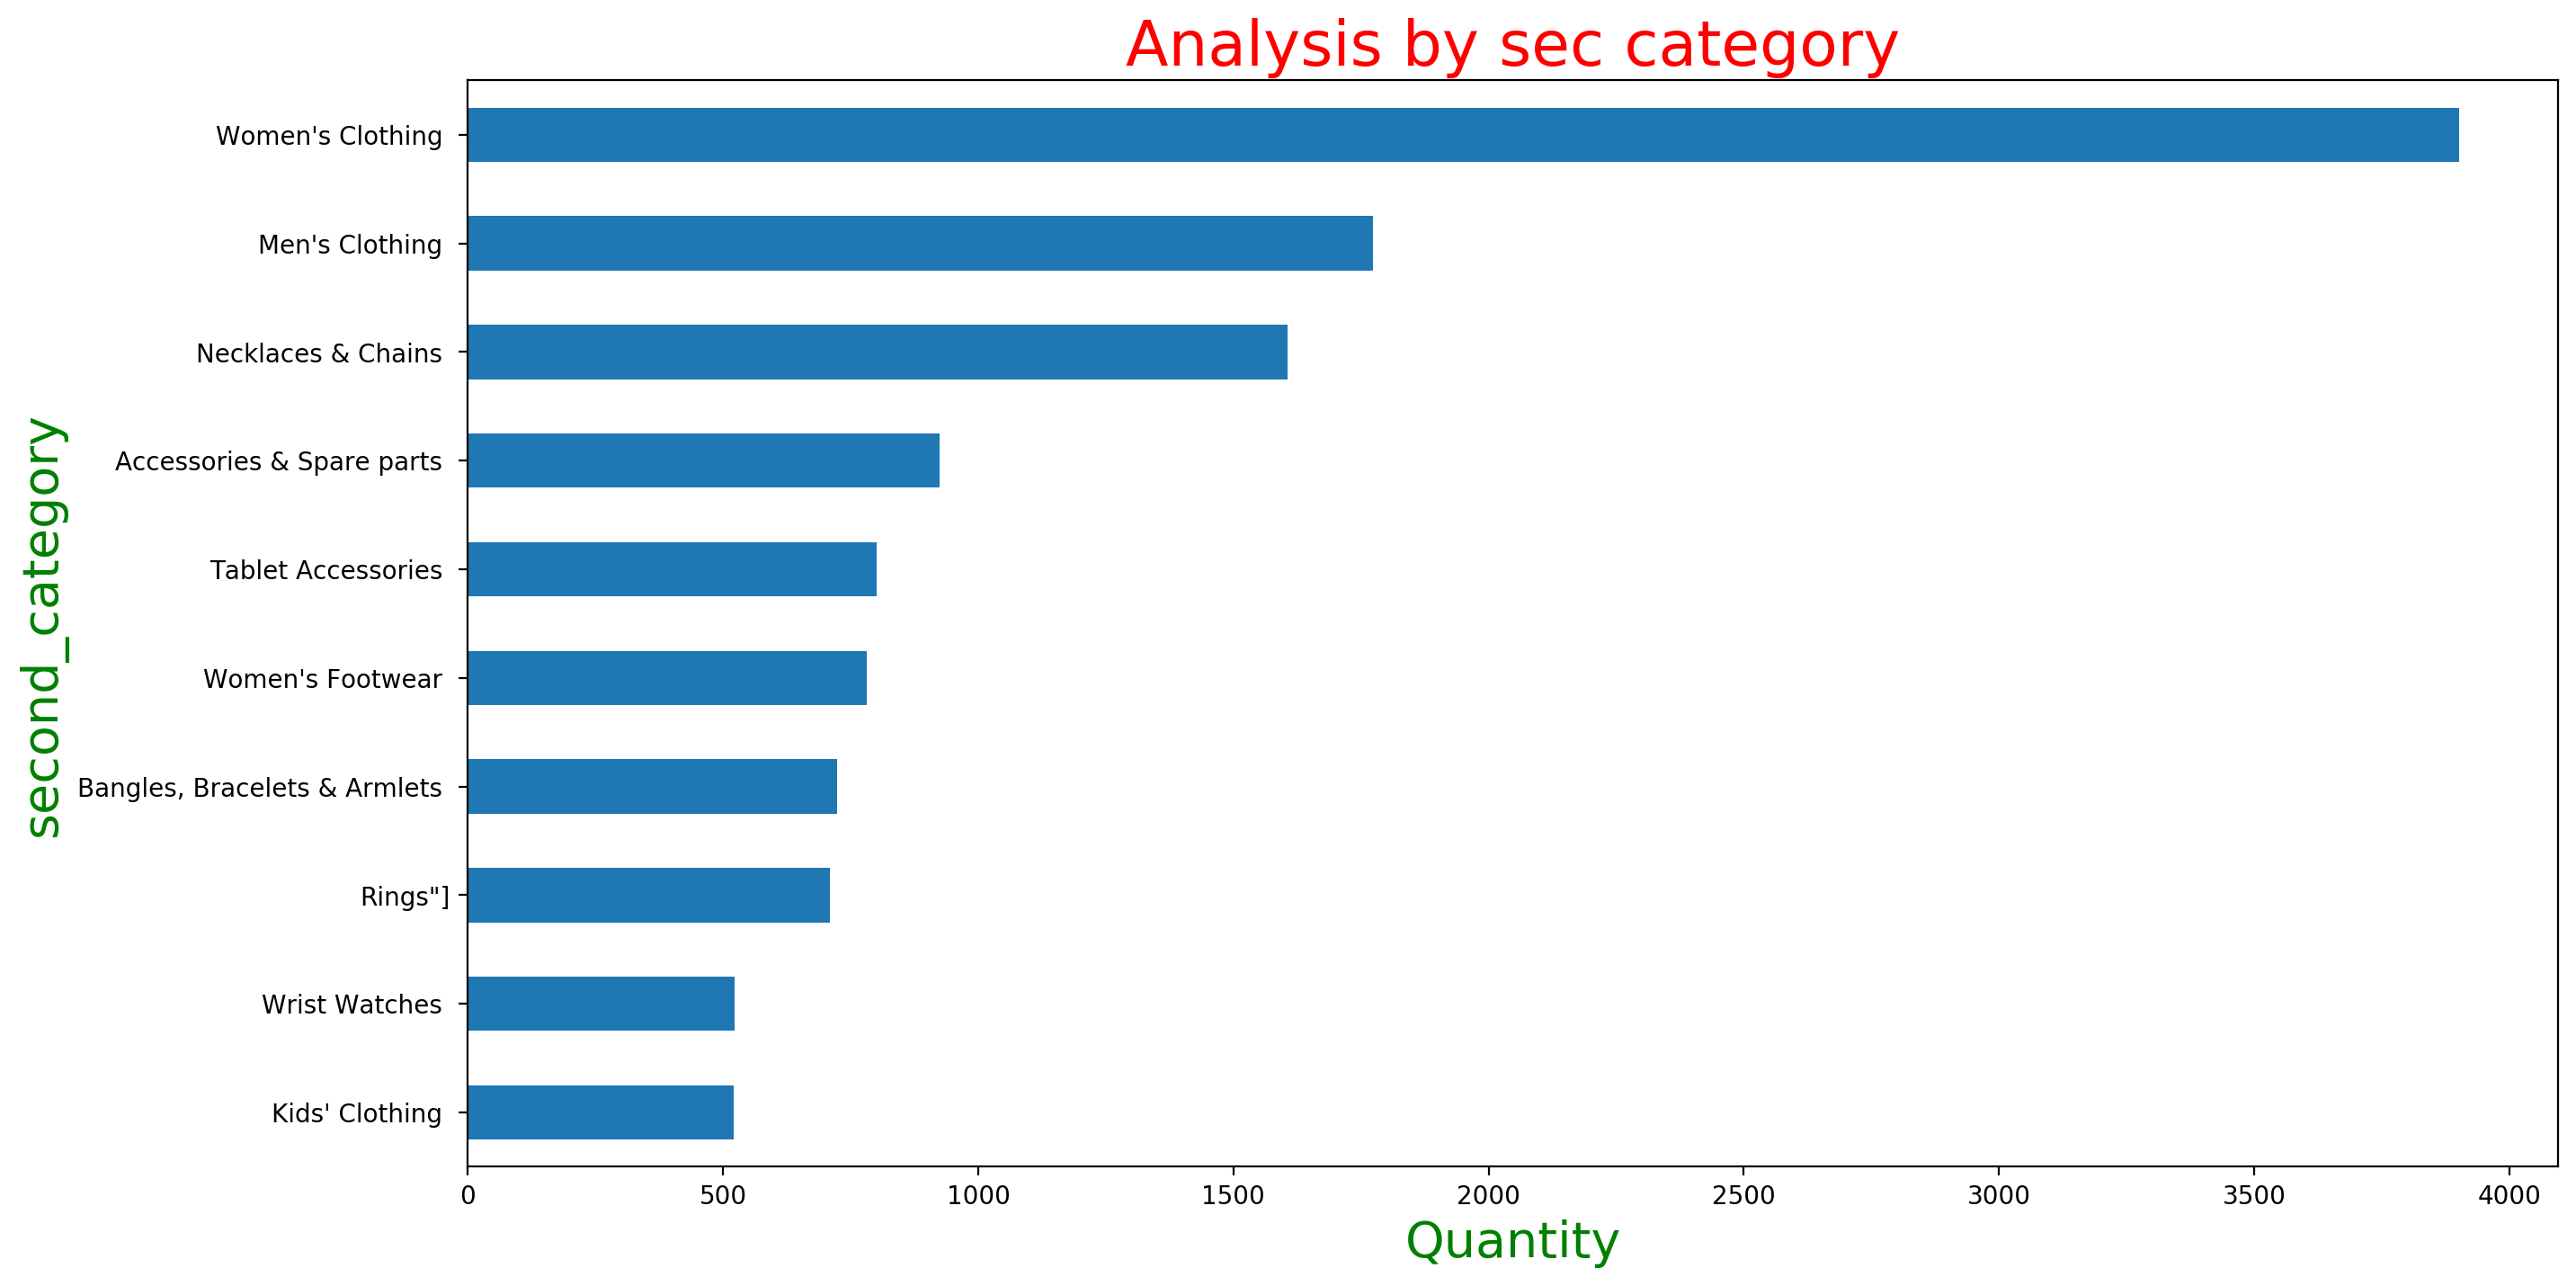

In [22]:
plt.figure(figsize=(15,8),dpi=200)
df.sec_category.value_counts()[:10].sort_values(ascending=True).plot(kind="barh")
plt.xlabel("Quantity",fontsize=20,color="green")
plt.ylabel("second_category",fontsize=20,color="green")
plt.title("Analysis by sec category",fontsize=25,color="red")
plt.show()

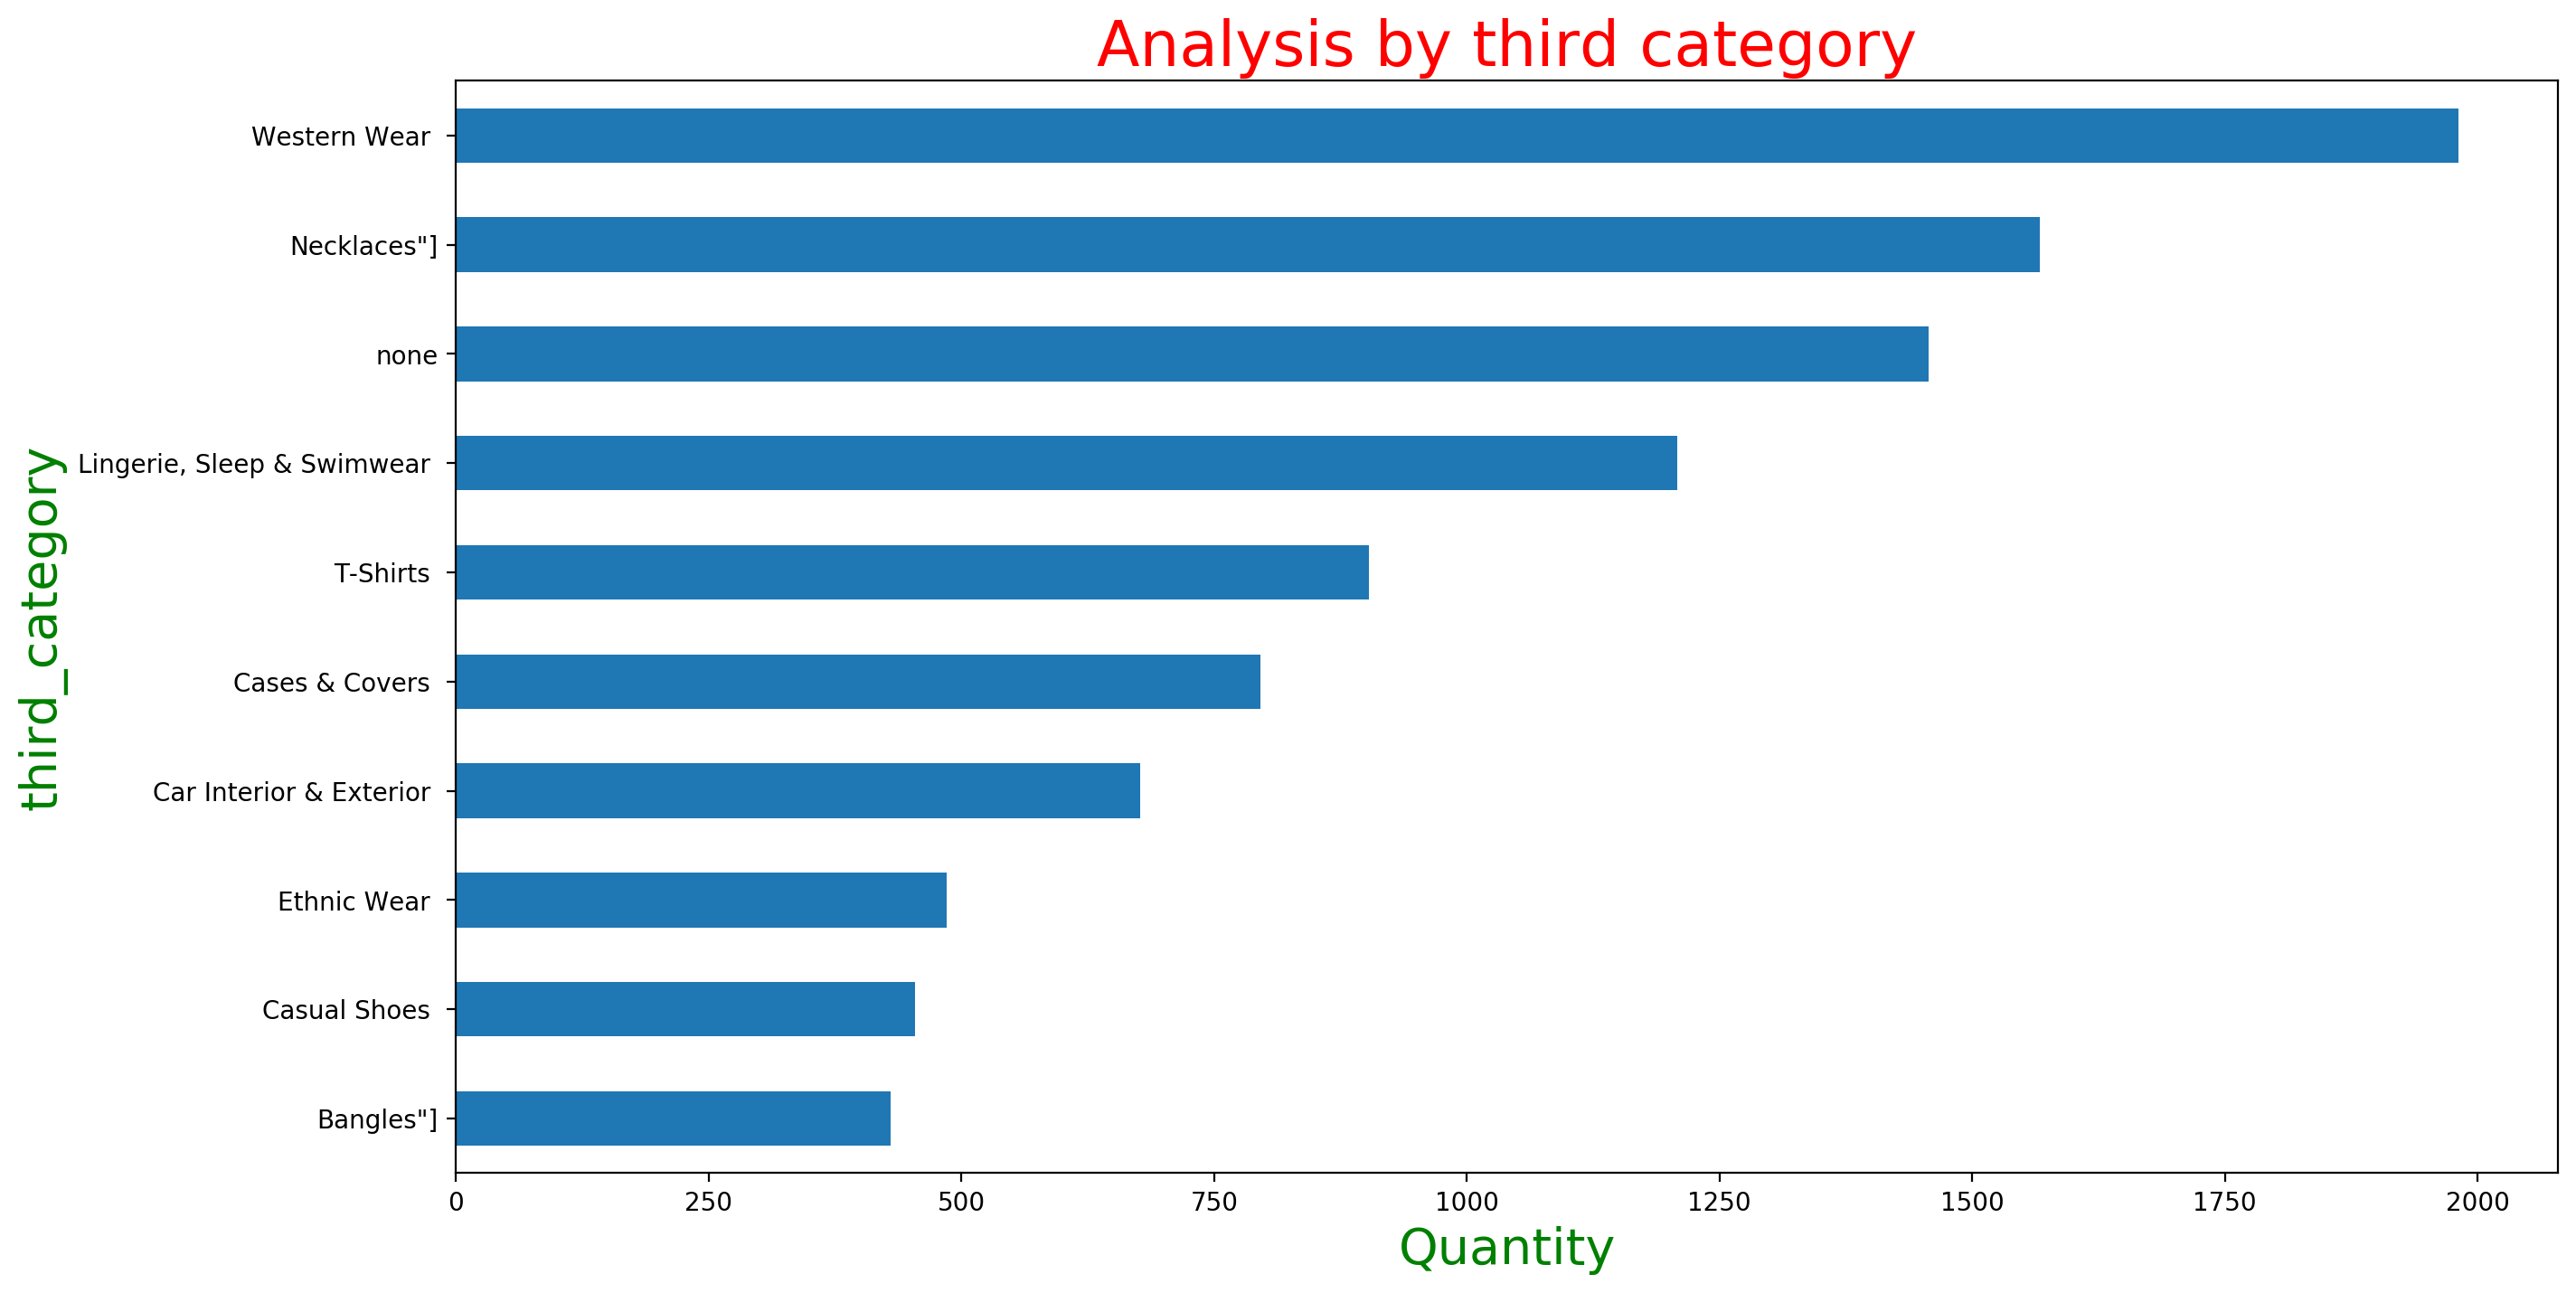

In [23]:
plt.figure(figsize=(15,8),dpi=200)
df.third_category.value_counts()[:10].sort_values(ascending=True).plot(kind="barh")
plt.xlabel("Quantity",fontsize=20,color="green")
plt.ylabel("third_category",fontsize=20,color="green")
plt.title("Analysis by third category",fontsize=25,color="red")
plt.show()

In [24]:
df["month"]=df.crawl_timestamp.dt.month

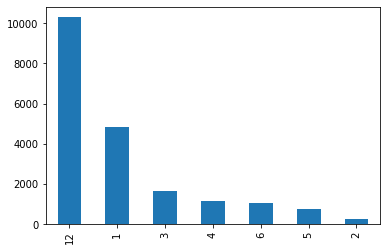

In [25]:
df.month.value_counts().plot(kind="bar")
##use groupby to get month start from 1 to 12


<function matplotlib.pyplot.show(*args, **kw)>

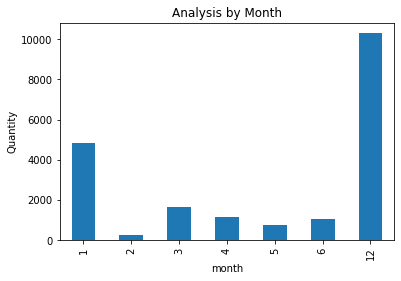

In [26]:
df.groupby("month")["month"].count().plot(kind="bar")
plt.xlabel("month")
plt.ylabel("Quantity")
plt.title("Analysis by Month")
plt.show

<BarContainer object of 7 artists>

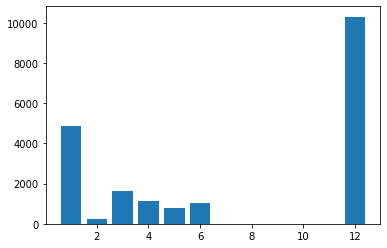

In [27]:
y=df.groupby("month").sum().reset_index()
plt.bar(y.month,df.groupby("month")["month"].count())

In [28]:
df["year"]=df.crawl_timestamp.dt.year
df["hour"]=df.crawl_timestamp.dt.hour

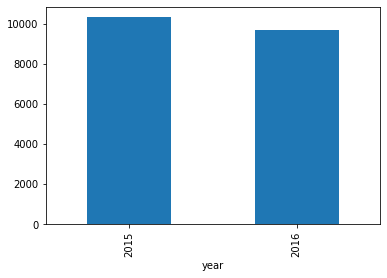

In [29]:
df.groupby("year")["year"].count().plot(kind="bar")


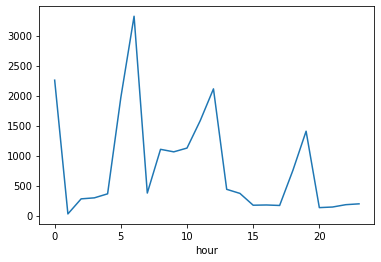

In [30]:
df.groupby("hour")["hour"].count().plot(kind="line")


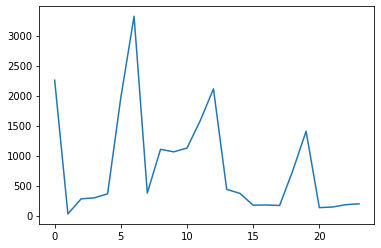

In [31]:
y=df.groupby("hour").sum().reset_index()
plt.plot(y.hour,df.groupby("hour")["hour"].count())
plt.show()

In [32]:
df["dis_%"]=100*(df.retail_price -df.discounted_price)/df.retail_price

In [33]:
df.dtypes

crawl_timestamp            datetime64[ns, UTC]
product_name                            object
product_category_tree                   object
pid                                     object
retail_price                           float64
discounted_price                       float64
image                                   object
is_FK_Advantage_product                   bool
description                             object
product_rating                          object
overall_rating                          object
brand                                   object
product_specifications                  object
first_category                          object
sec_category                            object
third_category                          object
fourth_category                         object
month                                    int64
year                                     int64
hour                                     int64
dis_%                                  float64
dtype: object

In [34]:
price=pd.DataFrame()

In [35]:
price=df[["retail_price","discounted_price","dis_%","product_name"]]

In [36]:
price.head()

,retail_price,discounted_price,dis_%,product_name
0,999.0,379.0,62.062062,Alisha Solid Women's Cycling Shorts
1,32157.0,22646.0,29.576764,FabHomeDecor Fabric Double Sofa Bed
2,999.0,499.0,50.050050,AW Bellies
3,699.0,267.0,61.802575,Alisha Solid Women's Cycling Shorts
4,220.0,210.0,4.545455,Sicons All Purpose Arnica Dog Shampoo


In [37]:
y=price.groupby("product_name").mean().reset_index()
y

,product_name,retail_price,discounted_price,dis_%
0,109F Solid Women's Tunic,1499.0,1049.0,30.020013
1,109f Checkered Women's Regular Skirt,1499.0,750.0,49.966644
2,11e Women Flats,499.0,349.0,30.060120
3,1OAK Women's Floral Print Casual Shirt,899.0,675.0,24.916574
4,1OAK Women's Polka Print Casual Shirt,799.0,599.0,25.031289
...,...,...,...,...
12671,"youniqueshop Plastic, Stainless Steel Hand Juicer",810.0,640.0,20.987654
12672,zDelhi.com Car Washer Z1 Ultra High Pressure W...,4499.0,3999.0,11.113581
12673,zaidis data_cable USB Cable,150.0,129.0,14.000000
12674,zasmina Slippers,700.0,319.5,54.357143


In [40]:
y.groupby("dis_%")[:20].sort_values(ascending=False).plot(kind="barh")

TypeError: unhashable type: 'slice'